In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 16)
matplotlib.rcParams['figure.dpi'] = 200

In [2]:
import scipy as science

In [3]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [97]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
# importing libraries
import os
import random
from tqdm import tqdm # for progress bar

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [98]:
# Convert the images into 3 channels as MNIST images are Black and White so have 1 channel
xtrain=np.dstack([x_train] * 3)
xtest=np.dstack([x_test]*3)
xtrain.shape,xtest.shape

((60000, 28, 84), (10000, 28, 84))

In [33]:
# Reshape images as per the tensor format required by tensorflow
xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [34]:
# Resize the images 48*48 as required by VGG16

from keras.preprocessing.image import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
#train_x = preprocess_input(x)
xtrain.shape, xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [37]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

model = VGG16(weights = 'imagenet', include_top = False, input_shape = (48, 48, 3))
img = preprocess_input(xtrain)
features = model.predict(img)
features = features.reshape(len(features), -1)

Summary of default VGG16 model.

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [54]:
features

array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
        52.80099 ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  1.519099,
         0.21543 ],
       [ 2.765145,  0.      ,  0.      , ...,  0.      , 49.705585,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

In [40]:
km = KMeans(n_clusters = 10)
clust_preds = km.fit_predict(StandardScaler().fit_transform(features))

In [100]:
itemindex = np.where(clust_preds==0)

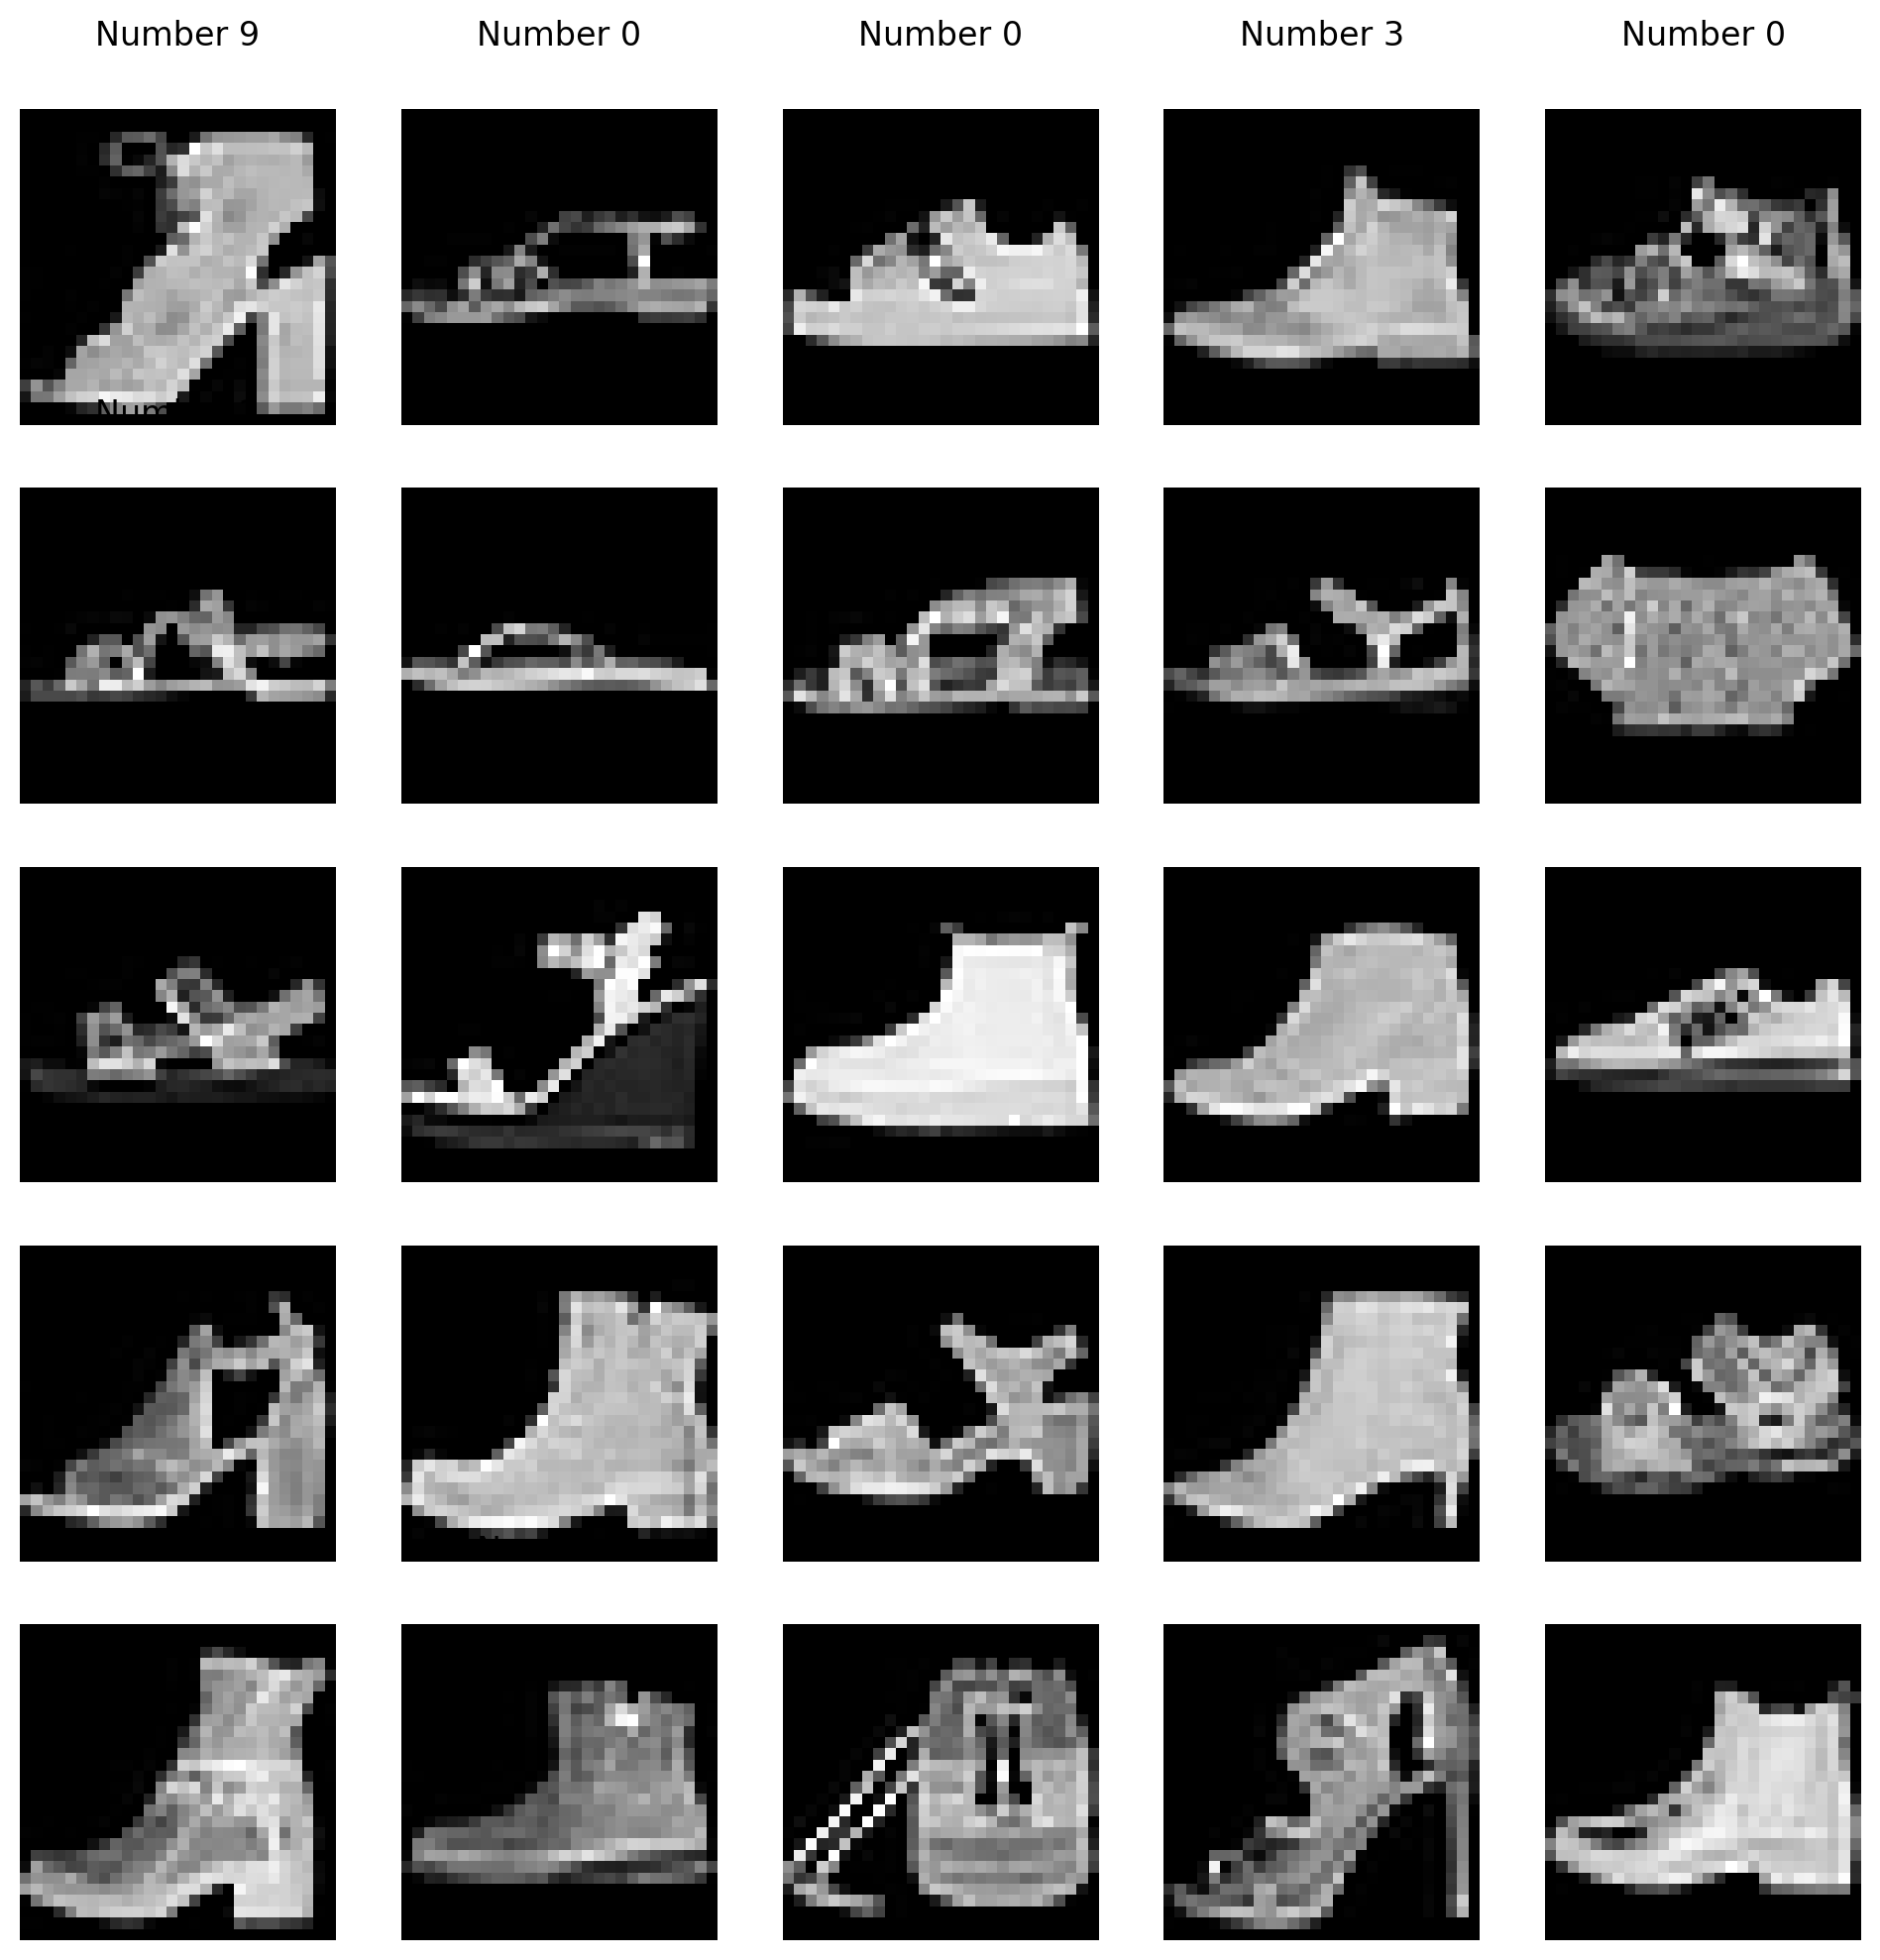

In [101]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[itemindex[0][i]])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
plt.show()

In [102]:
itemindex = np.where(clust_preds==7)

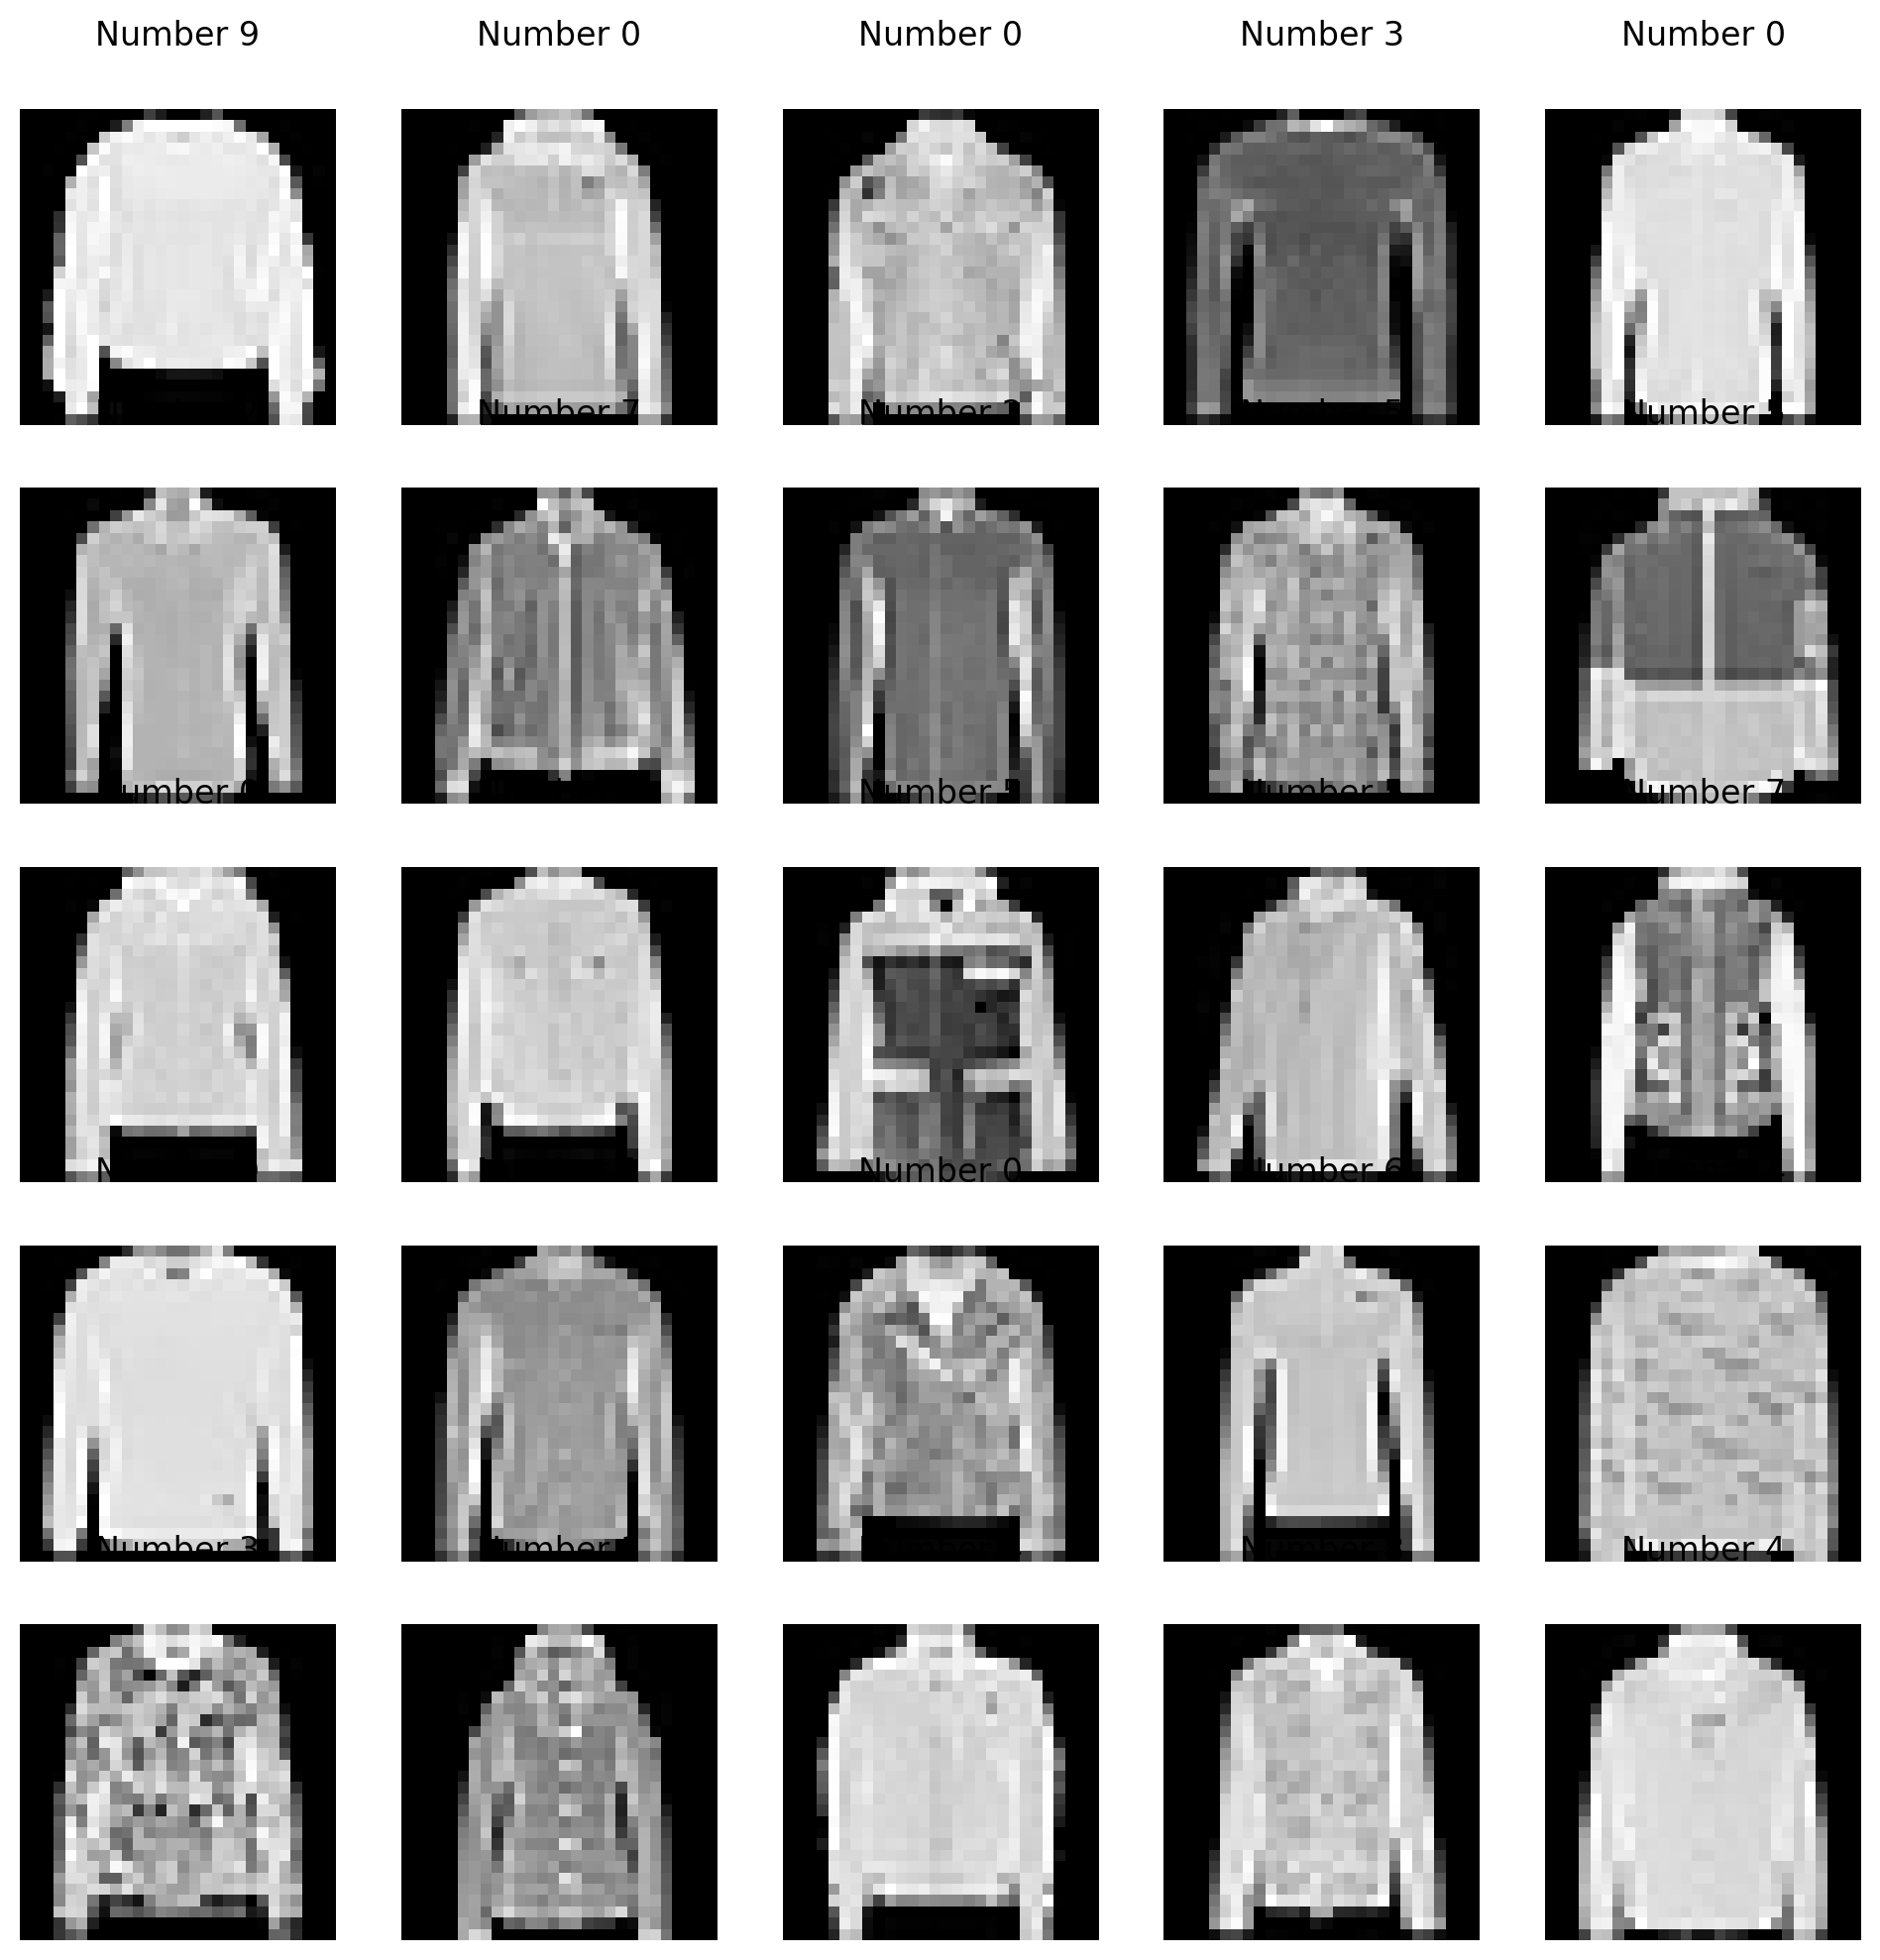

In [103]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[itemindex[0][i]])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
plt.show()